# Exploratory Data Analysis

### Name: Miji Kim
### Version: 1 May 2020

In [4]:
%matplotlib inline
#Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from motionchart.motionchart import MotionChart
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

# A: Exploratory Data Analysis of the Energy Dataset

## A1. Investigating the Energy Generation data for Victoria

### A1.1. 
First, the data for Victoria state is read into a dataframe. Some values for the fuel types are missing or have ‘Nan’. To handle it, these values are replaced with zero.

In [5]:
energy = pd.ExcelFile('energy_data.xlsx')
#Read the data for VIC
vic = pd.read_excel(energy,'VIC')

#Read the data for other states
tas = pd.read_excel(energy,'TAS')
sa = pd.read_excel(energy, 'SA')
nt = pd.read_excel(energy,'NT')
qld = pd.read_excel(energy,'QLD')
nsw = pd.read_excel(energy,'NSW')
wa = pd.read_excel(energy,'WA')

#Replace NaN with zero
vic = vic.replace(np.nan, 0)
#Check dataframe vic
print(vic)

   State             Fuel_Type             Category     2009     2010  \
0    VIC            Black coal  Non-renewable fuels      0.0      0.0   
1    VIC            Brown coal  Non-renewable fuels  52094.0  51541.7   
2    VIC           Natural gas  Non-renewable fuels   1451.9   1697.9   
3    VIC          Oil products  Non-renewable fuels     20.4      1.1   
4    VIC                 Other  Non-renewable fuels     61.1    115.9   
5    VIC               Biomass      Renewable fuels    292.0    303.4   
6    VIC                  Wind      Renewable fuels    573.0   1406.0   
7    VIC                 Hydro      Renewable fuels    557.8    843.7   
8    VIC  Large-scale solar PV      Renewable fuels      0.0      0.0   
9    VIC  Small-scale solar PV      Renewable fuels     24.1     66.2   
10   VIC            Geothermal      Renewable fuels      0.0      0.0   

       2011     2012     2013     2014     2015     2016     2017     2018  
0       0.0      0.0      0.0      0.0      0.

### A1.1.a. 
The total energy generation in Victoria over the time period covered in the dataset (2009 to 2018) is plotted. 
The trend observed in the overall energy generation for the given time period is described.

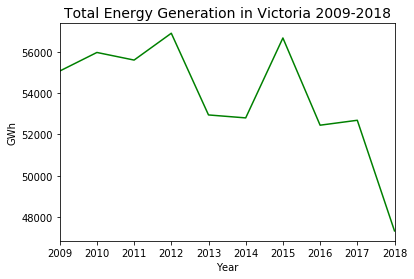

In [6]:
#Change the format of dataframe vic and save it to vic1
#Reference 1, Reference 2
vic1 = pd.melt(frame=vic, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
vic_groupbyYear = vic1.groupby('Year').agg(GWh=('GWh', 'sum'))

#Draw a plot
plt.plot(vic_groupbyYear, color = 'green')

#Add title, label, legend, etc.
#Reference 3
plt.title("Total Energy Generation in Victoria 2009-2018",fontsize=14)
plt.xlabel('Year')
plt.xlim(2009,2018) 
plt.ylabel('GWh')
plt.show()

#### Comment: 
From 2009 to 2012, there was a upward trend. However, despite rise from 2014 to 2015 and from 2016 to 2017 in Gigawatt hours, there was a downward trend in the total energy generation in Victoria from 2012 to 2018.

### A1.1.b. 
A new plot showing the trend in total renewable and non-renewable energy generation 
for the same time period is drawn. The trend observed from this graph is described.

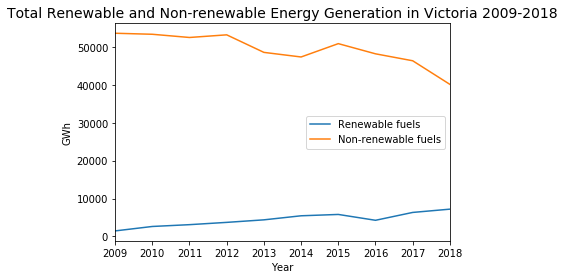

In [7]:
#Subset for renewable fuels and non-renewable fuels
vic_renew = vic1.loc[vic1['Category']=='Renewable fuels']
vic_nonrenew = vic1.loc[vic1['Category']=='Non-renewable fuels']
#Groupby year aggregating GWh
vic_renew = vic_renew.groupby(['Year']).agg(GWh=('GWh','sum'))
vic_nonrenew = vic_nonrenew.groupby(['Year']).agg(GWh=('GWh','sum'))

#Draw plots
plt.plot(vic_renew, label = 'Renewable fuels')
plt.plot(vic_nonrenew, label = 'Non-renewable fuels')
#Add title, label, legend, etc.
plt.title("Total Renewable and Non-renewable Energy Generation in Victoria 2009-2018",fontsize=14)
plt.xlabel('Year')
plt.xlim(2009,2018) 
plt.ylabel('GWh')
plt.legend()
plt.show()

#### Comment: 
From 2009 to 2018, though there was a slight rise from 2011 to 2012 and from 2014 to 2015, the overall trend for non-renewable fuels was downward. However, an upward trend can be seen in renewable fuels from 2009 to 2018, despite slight decrease from 2015 to 2016. 

### A1.1.c. 
A bar chart showing the breakdown of the different fuel types used for energy generation in 2009 vs in 2018 is drawn, followed by observation.

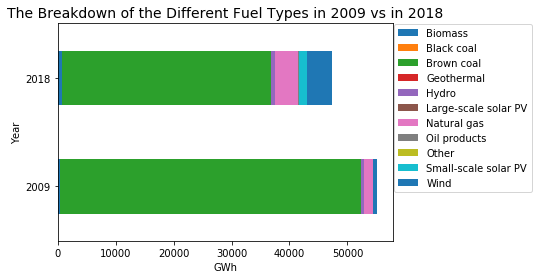

In [8]:
#Subset according to year
vic_2009 = vic1.loc[vic1['Year']==2009]
vic_2018 = vic1.loc[vic1['Year']==2018]
#Reference 7
vic_two = vic_2009.append(vic_2018).reset_index()
#Reference 8
vic_two = vic_two.pivot(index='Year',columns= 'Fuel_Type', values = 'GWh')
#print(vic_two)

#Draw a plot
vic_two.plot(kind = 'barh',stacked=True)
#Add title, label, legend, etc.
plt.title("The Breakdown of the Different Fuel Types in 2009 vs in 2018", fontsize=14)
plt.xlabel('GWh')
plt.ylabel('Year')
plt.legend(loc ='upper right',bbox_to_anchor=(1.43,1.02))
plt.show()

#### Comment: 
It is clear that the overall Gigawatt hours reduced in 2018, though "Brown coal" takes up significant portion for both 2009 and 2018. While, compared to 2009, the portion of "Brown coal" decreased, the portion of "Biomass", "Hydro", "Natural gas", and "Wind" increased in 2018. Among those fuel types, it is interesting to note that there was a significant increase in energy generation of "Natural gas" and "Wind" in 2018.

### A1.1.d. 
The most used energy resource (fuel-type) in 2015 is identified. The least used renewable fuel type in 2015 is identified. 

In [9]:
#Subset according to year
vic_2015 = vic1.loc[vic1['Year']==2015]
#Most used energy resource in 2015
print(vic_2015.loc[vic_2015['GWh'].idxmax()])
print()
#Least used renewable fuel type
vic_2015_renew = vic_2015.loc[vic_2015['Category']=='Renewable fuels']
print(vic_2015_renew.loc[vic_2015_renew['GWh'].idxmin()])
print()
#Least used renewable fuel type excluding Geothermal of which GWh is 0
vic_2015_renew = vic_2015_renew.loc[vic_2015_renew['GWh'] != 0]
print(vic_2015_renew.loc[vic_2015_renew['GWh'].idxmin()])

State                        VIC
Fuel_Type             Brown coal
Category     Non-renewable fuels
Year                        2015
GWh                      48336.8
Name: 67, dtype: object

State                    VIC
Fuel_Type         Geothermal
Category     Renewable fuels
Year                    2015
GWh                        0
Name: 76, dtype: object

State                         VIC
Fuel_Type    Large-scale solar PV
Category          Renewable fuels
Year                         2015
GWh                           9.1
Name: 74, dtype: object


#### Comment: 
The most used energy resource in 2015 was "Brown coal".
The least used renewable fuel type in 2015 was "Large-scale solar PV".
(Although the GWh value of "Geothermal" in 2015 is 0, this value was "NaN" replaced with zero in the beginning.) 

### A1.1.e. 
A plot showing the percentage of Victoria's energy generation coming from Renewable vs Non-Renewable energy sources over the period 2009 to 2018 is drawn. The trend observed from this plot is described.

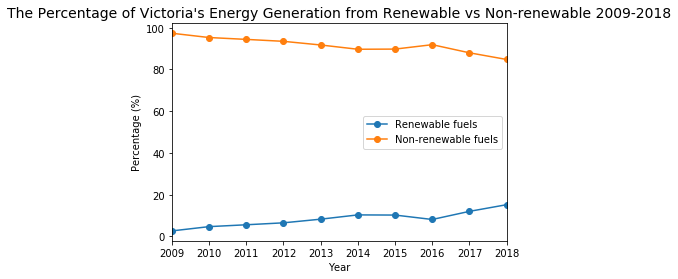

In [10]:
#Subset groupby year aggregating GWh 
vic1_total = vic1.groupby(['Year']).agg(GWh=('GWh','sum'))
#print(vic1_total)
vic1_renew = vic1.loc[vic1['Category']=='Renewable fuels']
vic1_nonrenew = vic1.loc[vic1['Category']=='Non-renewable fuels']

vic1_re_groupby = vic1_renew.groupby(['Year']).agg(GWh=('GWh','sum'))
vic1_no_groupby = vic1_nonrenew.groupby(['Year']).agg(GWh=('GWh','sum'))

#Extract unique year to be used later
vic_year = list(vic1['Year'].unique())
#Calculate percentage per renewable and non-renewable
vic1_re_groupby['Percentage'] = (vic1_re_groupby['GWh']/vic1_total['GWh']) * 100
vic1_no_groupby['Percentage'] = (vic1_no_groupby['GWh']/vic1_total['GWh']) * 100
vic1_re_groupby.insert(loc=0,column='Year', value=vic_year)
vic1_no_groupby.insert(loc=0,column='Year', value=vic_year)
#print(vic1_re_groupby)
#print(vic1_no_groupby)

#Draw plots
plt.plot(vic1_re_groupby['Year'],vic1_re_groupby['Percentage'],'-o',label='Renewable fuels')
plt.plot(vic1_no_groupby['Year'],vic1_no_groupby['Percentage'],'-o',label='Non-renewable fuels')
#Add title, label, legend, etc.
plt.title("The Percentage of Victoria's Energy Generation from Renewable vs Non-renewable 2009-2018",fontsize=14)
plt.xlabel('Year')
plt.xlim(2009,2018) 
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

#### Comment: 
It is noted that there was an increase of percentage from 2015 (90%) to 2016 (92%) in Non-renewable fuels and a decrease of percentage from 2015 (10%) to 2016 (8%) in Renewable fuels. However, the overall trend of Renewable fuels is upward, while non-renewable fuels is having a downward trend. 

### A1.1.f.
Using a linear regression model, the percentage of Victoria’s energy generation coming from Renewable energy sources in the year 2030 and 2100 is predicted. 

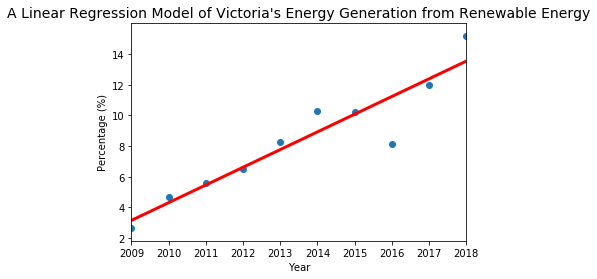

Predicted percentage of Victoria's renewable energy generation in 2030 is:  27 %
Predicted percentage of Victoria's renewable energy generation in 2100 is:  108 %


In [11]:
#Linear regression model
slope, intercept, r_value, p_value, std_err = linregress(vic1_re_groupby['Year'],vic1_re_groupby['Percentage'])
#Use "for" syntax to compute the line
line = [slope*xi + intercept for xi in vic1_re_groupby['Year']]
#Plot the "line"
plt.plot(vic1_re_groupby['Year'],line,'r-', linewidth=3)
#Reference 12
plt.scatter(vic1_re_groupby['Year'], vic1_re_groupby['Percentage'])
#Add title, label, legend, etc.
plt.title("A Linear Regression Model of Victoria's Energy Generation from Renewable Energy",fontsize=14)
plt.xlabel('Year')
plt.xlim(2009,2018) 
plt.ylabel('Percentage (%)')
plt.show()
#Compute the line for prediction
year_2030 = slope*(2030) + intercept
year_2100 = slope*(2100) + intercept
print("Predicted percentage of Victoria's renewable energy generation in 2030 is: ", int(year_2030),"%")
print("Predicted percentage of Victoria's renewable energy generation in 2100 is: ", int(year_2100),"%")

#### Comment: 
Predicted percentage of Victoria’s renewable energy generation in 2030 is 27%
Predicted percentage of Victoria’s renewable energy generation in 2100 is 108%.
The prediction for 2030 which is 27% seems reasonable considering the trend shown in the graph. However, when it comes to the predicted percentage in 2100 which is 108%, it is not reasonable as the value should not exceed 100%. 

## A2. Investigating the Energy Generation data for Australia

### A2.1. 
Further investigation is done by combining the data for all the states and territories in Australia. The data for the rest of the states is read and merged in a single dataframe.

In [12]:
#Change the format of dataframe TAS, SA, NT,QLD, NSW, and WA and save it to a new variable
tas1 = pd.melt(frame=tas, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
sa1 = pd.melt(frame=sa, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
nt1 = pd.melt(frame=nt, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
qld1 = pd.melt(frame=qld, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
nsw1 = pd.melt(frame=nsw, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
wa1 = pd.melt(frame=wa, id_vars=['State','Fuel_Type','Category'], var_name="Year", value_name="GWh")
#Merge into a single dataframe
frames = [vic1,tas1,sa1,nt1,qld1,nsw1,wa1]
#Reference 5
total = pd.concat(frames)
#Replace NaN with zero
total = total.replace(np.nan, 0)
print(total)

    State             Fuel_Type             Category  Year      GWh
0     VIC            Black coal  Non-renewable fuels  2009      0.0
1     VIC            Brown coal  Non-renewable fuels  2009  52094.0
2     VIC           Natural gas  Non-renewable fuels  2009   1451.9
3     VIC          Oil products  Non-renewable fuels  2009     20.4
4     VIC                 Other  Non-renewable fuels  2009     61.1
..    ...                   ...                  ...   ...      ...
105    WA                  Wind      Renewable fuels  2018   1593.0
106    WA                 Hydro      Renewable fuels  2018    217.9
107    WA  Large-scale solar PV      Renewable fuels  2018     45.6
108    WA  Small-scale solar PV      Renewable fuels  2018   1196.4
109    WA            Geothermal      Renewable fuels  2018      0.0

[770 rows x 5 columns]


### A2.1.a. 
A column chart showing the total energy generated in Australia by fuel type in the year 2018 is plotted.

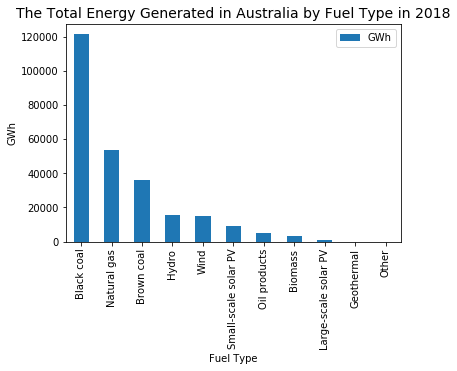

In [13]:
#Subset according to year
total_2018 = total.loc[total['Year']==2018]
total_2018_groupby = total_2018.groupby('Fuel_Type').agg(GWh=('GWh', 'sum'))
total_2018_groupby.insert(loc=0,column='Fuel_Type', value=total_2018_groupby.index)

#Plot a column chart with sorted values 
#Reference 6, Reference 14
total_2018_groupby.sort_values('GWh',ascending=False).plot(kind='bar',x='Fuel_Type',y='GWh')

#Add title, label, legend, etc.
plt.title("The Total Energy Generated in Australia by Fuel Type in 2018", fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('GWh')
plt.show()

### A2.1.b. 
The state with the highest energy production in 2018 is identified. The ratio (percentage breakdown) of renewable vs non-renewable energy production for that state in 2018 is calculated.

State      NSW
GWh      71860
Name: NSW, dtype: object

NSW had the highest energy production in 2018


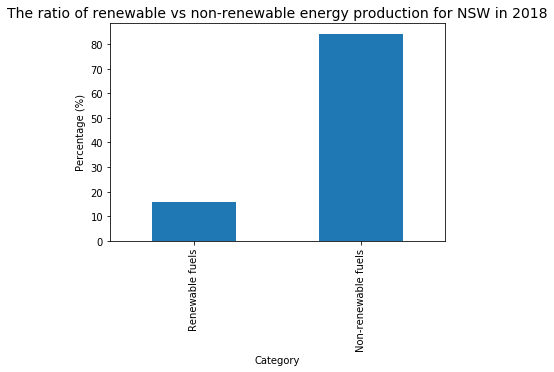

The ratio of renewable vs non-renewable energy production is  15.66  :  84.34


In [14]:
#Subset groupby state aggregating GWh
total_2018_state= total_2018.groupby('State').agg(GWh=('GWh', 'sum'))
total_2018_state.insert(loc=0,column='State', value=total_2018_state.index)

#Find the highest energy production in 2018
print(total_2018_state.loc[total_2018_state['GWh'].idxmax()])
print()
#Save the value of max GWh and corresponding state to a new variable
max_gwh = int(total_2018_state['GWh'].max())
max_state = total_2018_state[total_2018_state['GWh'] == max_gwh].iloc[0,0]
#Answer to the first question
print(max_state, "had the highest energy production in 2018")

#Subset nsw data 
total_2018_nsw = total_2018.loc[total_2018['State']=='NSW']
#Calculate the total GWh generated in 2018 for NSW
nsw_totalgwh = total_2018_nsw.groupby('State').agg(GWh=('GWh','sum'))
#Subset data per category
nsw_renew = total_2018_nsw.loc[total_2018_nsw['Category']=='Renewable fuels']
nsw_nonrenew = total_2018_nsw.loc[total_2018_nsw['Category']=='Non-renewable fuels']
#Aggregate GWh per category
nsw_renew_agg = nsw_renew.groupby('Category').agg(GWh=('GWh', 'sum'))
nsw_nonrenew_agg = nsw_nonrenew.groupby('Category').agg(GWh=('GWh','sum'))

#Calculate percentage
nsw_renew_agg['Percentage'] = (nsw_renew_agg.iloc[0,0]/nsw_totalgwh.iloc[0,0]) * 100
nsw_renew_agg.insert(loc=0,column='Category', value='Renewable fuels')
nsw_nonrenew_agg['Percentage'] = (nsw_nonrenew_agg.iloc[0,0]/nsw_totalgwh.iloc[0,0]) * 100
nsw_nonrenew_agg.insert(loc=0,column='Category', value='Non-renewable fuels')

#Combine two dataframes
nsw_two = nsw_renew_agg.append(nsw_nonrenew_agg)
#Reference 7
nsw_two.reset_index(inplace = True, drop = True)

#Draw a plot
nsw_two.plot(kind = 'bar', x='Category', y='Percentage', legend = False)
#Add title, label, etc.
plt.title("The ratio of renewable vs non-renewable energy production for NSW in 2018", fontsize=14)
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.show()
#Answer to the second question
per_renew = nsw_two.iloc[0,2]
per_nonrenew = nsw_two.iloc[1,2]
print("The ratio of renewable vs non-renewable energy production is ", round(per_renew,2), " : ",round(per_nonrenew,2))

#### Comment: 
As seen from the above, NSW had the highest energy production in 2018 with 71860 GWh. For NSW in 2018, the ratio of renewable and non-renewable energy production is 15.66 : 84.34 and those figures were rounded to two decimal places.

### A2.1.c. 
A plot showing the percentage of energy generation from renewable energy sources for each state over the period 2009 to 2018 is drawn. From this graph, the state making the most progress towards adopting green energy is identified.

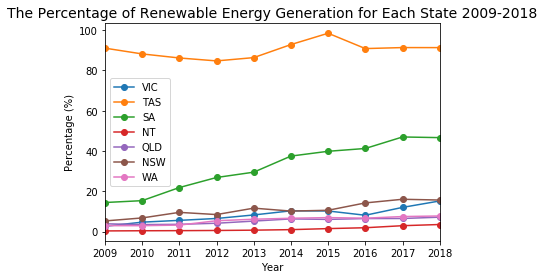

In [15]:
#VIC
#total from VIC
vicf_total_gwh = vic1.groupby('Year').agg(GWh=('GWh', 'sum'))
#Reference 7
vicf_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
vicf_renew = vic1.loc[vic1['Category']=='Renewable fuels']
vicf_renew = vicf_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
vicf_renew.insert(loc=0,column='Year',value=vic_year)
vicf_renew.reset_index(inplace = True, drop = True)
vicf_renew.insert(loc=1,column='State', value='VIC')
vicf_renew['Percentage'] = (vicf_renew['GWh']/vicf_total_gwh['GWh']) * 100
vicf_final = vicf_renew[['Year','State','Percentage']]

#TAS
tas1 = tas1.replace(np.nan, 0)
#Total from TAS
tas_total_gwh = tas1.groupby('Year').agg(GWh=('GWh', 'sum'))
tas_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
tas_renew = tas1.loc[tas1['Category']=='Renewable fuels']
tas_renew = tas_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
tas_renew.insert(loc=0,column='Year',value=vic_year)
tas_renew.reset_index(inplace = True, drop = True)
tas_renew.insert(loc=1,column='State', value='TAS')
tas_renew['Percentage'] = (tas_renew['GWh']/tas_total_gwh['GWh']) * 100
tas_final = tas_renew[['Year','State','Percentage']]
#print(tas_final)
#SA
sa1 = sa1.replace(np.nan, 0)
#Total from SA
sa_total_gwh = sa1.groupby('Year').agg(GWh=('GWh', 'sum'))
sa_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
sa_renew = sa1.loc[sa1['Category']=='Renewable fuels']
sa_renew = sa_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
sa_renew.insert(loc=0,column='Year',value=vic_year)
sa_renew.reset_index(inplace = True, drop = True)
sa_renew.insert(loc=1,column='State', value='SA')
sa_renew['Percentage'] = (sa_renew['GWh']/sa_total_gwh['GWh']) * 100
sa_final = sa_renew[['Year','State','Percentage']]
#print(sa_renew)
#NT
nt1 = nt1.replace(np.nan, 0)
#Total from NT
nt_total_gwh = nt1.groupby('Year').agg(GWh=('GWh', 'sum'))
nt_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
nt_renew = nt1.loc[nt1['Category']=='Renewable fuels']
nt_renew = nt_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
nt_renew.insert(loc=0,column='Year',value=vic_year)
nt_renew.reset_index(inplace = True, drop = True)
nt_renew.insert(loc=1,column='State', value='NT')
nt_renew['Percentage'] = (nt_renew['GWh']/nt_total_gwh['GWh']) * 100
nt_final = nt_renew[['Year','State','Percentage']]

#QLD
qld1 = qld1.replace(np.nan, 0)
#Total from QLD
qld_total_gwh = qld1.groupby('Year').agg(GWh=('GWh', 'sum'))
qld_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
qld_renew = qld1.loc[qld1['Category']=='Renewable fuels']
qld_renew = qld_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
qld_renew.insert(loc=0,column='Year',value=vic_year)
qld_renew.reset_index(inplace = True, drop = True)
qld_renew.insert(loc=1,column='State', value='QLD')
qld_renew['Percentage'] = (qld_renew['GWh']/qld_total_gwh['GWh']) * 100
qld_final = qld_renew[['Year','State','Percentage']]

#NSW
nswf = nsw1.replace(np.nan, 0)
#Total from NSW
nswf_total_gwh = nswf.groupby('Year').agg(GWh=('GWh', 'sum'))
nswf_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
nswf_renew = nswf.loc[nswf['Category']=='Renewable fuels']
nswf_renew = nswf_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
nswf_renew.insert(loc=0,column='Year',value=vic_year)
nswf_renew.reset_index(inplace = True, drop = True)
nswf_renew.insert(loc=1,column='State', value='NSW')
nswf_renew['Percentage'] = (nswf_renew['GWh']/nswf_total_gwh['GWh']) * 100
nswf_final = nswf_renew[['Year','State','Percentage']]

#wa
wa1 = wa1.replace(np.nan, 0)
#Total from WA
wa_total_gwh = wa1.groupby('Year').agg(GWh=('GWh', 'sum'))
wa_total_gwh.reset_index(inplace = True, drop = True)
#Subset data for renewable fuels
wa_renew = wa1.loc[nswf['Category']=='Renewable fuels']
wa_renew = wa_renew.groupby('Year').agg(GWh=('GWh', 'sum'))
wa_renew.insert(loc=0,column='Year',value=vic_year)
wa_renew.reset_index(inplace = True, drop = True)
wa_renew.insert(loc=1,column='State', value='WA')
wa_renew['Percentage'] = (wa_renew['GWh']/wa_total_gwh['GWh']) * 100
wa_final = wa_renew[['Year','State','Percentage']]

#Plot
plt.plot(vicf_final['Year'],vicf_final['Percentage'],'-o',label='VIC')
plt.plot(tas_final['Year'],tas_final['Percentage'],'-o',label='TAS')
plt.plot(sa_final['Year'],sa_final['Percentage'],'-o',label='SA')
plt.plot(nt_final['Year'],nt_final['Percentage'],'-o',label='NT')
plt.plot(qld_final['Year'],qld_final['Percentage'],'-o',label='QLD')
plt.plot(nswf_final['Year'],nswf_final['Percentage'],'-o',label='NSW')
plt.plot(wa_final['Year'],wa_final['Percentage'],'-o',label='WA')
#Add title, label, legend, etc.
plt.title("The Percentage of Renewable Energy Generation for Each State 2009-2018",fontsize=14)
plt.xlabel('Year')
plt.xlim(2009,2018) 
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

#### Comment: 
As seen from the above, Tasmania (TAS) has been steadily generating significant amount of renewable energy compared to other states. For instance, around 91% of energy was generated from renewable energy in 2018. However, it can be said that South Australia (SA) is showing progress towards adopting green energy as its percentage of renewable energy generation increased from approximately 14% to 47% over the period 2009 to 2018.

## A3. Visualising the Relationship over Time
The relationship between all variables impacting the energy generation over time is investigated. All the data from the different states is now combined. This data is aggregated by year, state, the total energy produced (total_production), and has a separate column for each of the fuel types.

In [16]:
#Reshape the dataframe

#VIC
#print(vicf_total_gwh)
#Reference 8
vic2 = pd.pivot_table(vic1, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
vic2.insert(loc=0,column='Year',value=vic_year)
vic2.insert(loc=0,column='State',value='VIC')
#Reference 7
vic2.reset_index(inplace = True, drop = True)
vic2.insert(loc=2,column='Total_Production', value=vicf_total_gwh)

#TAS
#print(tas_total_gwh)
tas2 = pd.pivot_table(tas1, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
tas2.insert(loc=0,column='Year',value=vic_year)
tas2.insert(loc=0,column='State',value='TAS')
tas2.reset_index(inplace = True, drop = True)
tas2.insert(loc=2,column='Total_Production', value=tas_total_gwh)

#SA
#print(sa_total_gwh)
sa2 = pd.pivot_table(sa1, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
sa2.insert(loc=0,column='Year',value=vic_year)
sa2.insert(loc=0,column='State',value='SA')
sa2.reset_index(inplace = True, drop = True)
sa2.insert(loc=2,column='Total_Production', value=sa_total_gwh)
#print(sa2)

#NT
#print(nt_total_gwh)
nt2 = pd.pivot_table(nt1, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
nt2.insert(loc=0,column='Year',value=vic_year)
nt2.insert(loc=0,column='State',value='NT')
nt2.reset_index(inplace = True, drop = True)
nt2.insert(loc=2,column='Total_Production', value=nt_total_gwh)

#QLD
#print(qld_total_gwh)
qld2 = pd.pivot_table(qld1, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
qld2.insert(loc=0,column='Year',value=vic_year)
qld2.insert(loc=0,column='State',value='QLD')
qld2.reset_index(inplace = True, drop = True)
qld2.insert(loc=2,column='Total_Production', value=qld_total_gwh)
#print(qld2)

#NSW
#print(nswf_total_gwh)
nsw2 = pd.pivot_table(nswf, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
nsw2.insert(loc=0,column='Year',value=vic_year)
nsw2.insert(loc=0,column='State',value='NSW')
nsw2.reset_index(inplace = True, drop = True)
nsw2.insert(loc=2,column='Total_Production', value=nswf_total_gwh)
#print(nsw2)

#WA
#print(wa_total_gwh)
wa2 = pd.pivot_table(wa1, values='GWh', index=['State','Year'],columns= 'Fuel_Type')
wa2.insert(loc=0,column='Year',value=vic_year)
wa2.insert(loc=0,column='State',value='WA')
wa2.reset_index(inplace = True, drop = True)
wa2.insert(loc=2,column='Total_Production', value=wa_total_gwh)
#print(wa2)

#Combine all the data from each state
a3_frames = [vic2,tas2,sa2,nt2,qld2,nsw2,wa2]
#Reference 5
a3_total = pd.concat(a3_frames)
a3_total.reset_index(inplace = True, drop = True)
print(a3_total)

Fuel_Type State  Year  Total_Production  Biomass  Black coal  Brown coal  \
0           VIC  2009           55074.3    292.0         0.0     52094.0   
1           VIC  2010           55975.9    303.4         0.0     51541.7   
2           VIC  2011           55607.0    339.6         0.0     51066.5   
3           VIC  2012           56907.8    859.3         0.0     52059.7   
4           VIC  2013           52946.6    845.1         0.0     45317.6   
..          ...   ...               ...      ...         ...         ...   
65           WA  2014           36679.5    124.0     10885.3         0.0   
66           WA  2015           37781.9    126.9     10523.4         0.0   
67           WA  2016           38736.9     94.6     10912.7         0.0   
68           WA  2017           40039.0    183.2     11226.2         0.0   
69           WA  2018           41395.6    153.0     10960.9         0.0   

Fuel_Type  Geothermal   Hydro  Large-scale solar PV  Natural gas  \
0                 0

### A3.1. 
A Motion Chart which visualises the energy production trend for Australia over time is built using Python. The motion chart shows the units of energy production using Wind on the x-axis and the energy production using Natural gas on the y-axis. The colour represents the states/territories and the bubble size shows the total_production.

In [17]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [18]:
#Generate the motionchart and show
mChart = MotionChart(df = a3_total, key='Year',x='Wind',y='Natural gas', xscale='linear', yscale='linear',
                    size='Total_Production', color='State', category='State',
                     title = 'The Energy Production Trend for Australia')

mChart.to_notebook()

Screentshot of motion chart to be shown in PDF

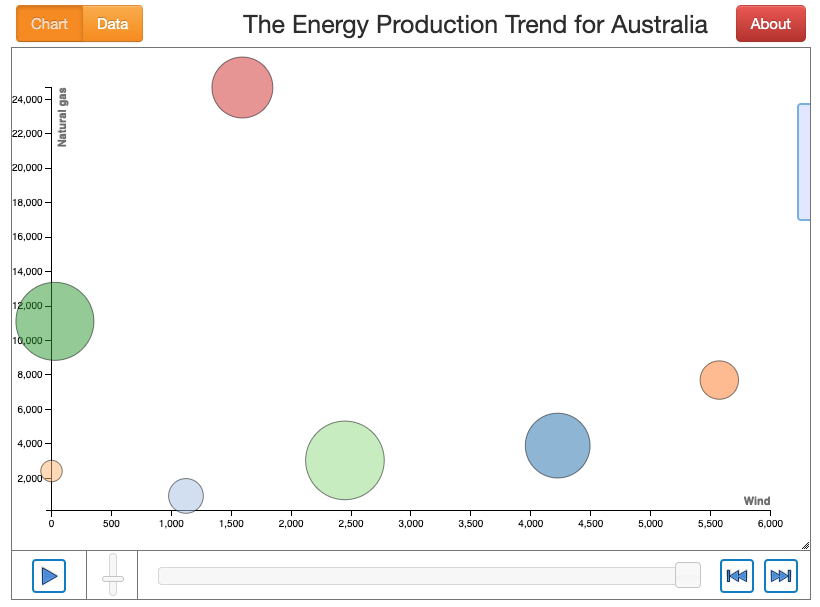

### A3.2. 
The visualisation is run from start to end.

### A3.2.a.
The general trend regarding reliance on wind energy vs reliance on natural gas for each Australian state overtime is identified. 

#### Comment:
Overall, there is no definite relationship between Wind energy and Natural gas throughout Australia.

VIC: It is hard to see relationship between the two variables. For instance, despite the upward trend on reliance for both fuels, there were opposite trends from 2014 to 2016.
TAS: There is no clear relationship between the two variables. For instance, while the reliance on Wind increased by approximately 70% from 2013 to 2014, the reliance on Natural gas was halved over the same period. In fact, the reliance on Wind from 2009 to 2013 was quite stagnant, whereas the reliance on Natural gas increased continuously during the same period.
SA: In South Australia, two variables do not seem related. The reliance on Wind increase significantly from 2009 to 2018, while the reliance on Natural gas had been stagnant over time.
NT: As to Northern Territory, it is difficult to identify relationship between Wind and Natural gas as there is no value recorded for Wind. 
QLD: No definite relationship can be found in Queensland. The reliance on Wind was very minimal and stagnant over time, the reliance on Natural gas was quite high thought it fluctuated over time. 
NSW: There seems no relationship between Wind energy and Natural gas. The reliance on Wind increased greatly over time, while the reliance on Natural gas increased not as much as Wind and it fluctuated over time.
WA: It is difficult to identify relationship between the two variables. The reliance on Natural gas continuously increased over time, while the reliance on Wind fluctuated during the same time.

### A3.2.b.
The state that relied most on natural gas for energy production in 2013 is identified. 

In [19]:
a3_total_2013= a3_total.loc[a3_total['Year']==2013]
#Find the state that relied most on natural gas for energy production in 2013
a3_total_2013_df = pd.DataFrame(a3_total_2013.loc[a3_total_2013['Natural gas'].idxmax()])
print(a3_total_2013_df)
max_2013_state = a3_total_2013_df.iloc[0,0]
print()
#Answer 
print(max_2013_state, "relied most on Natural gas for energy production in 2013.")

                           64
Fuel_Type                    
State                      WA
Year                     2013
Total_Production      33902.1
Biomass                 108.3
Black coal            10276.9
Brown coal                  0
Geothermal                  0
Hydro                   221.3
Large-scale solar PV        0
Natural gas           17645.1
Oil products             2045
Other                  1855.8
Small-scale solar PV    449.5
Wind                   1300.2

WA relied most on Natural gas for energy production in 2013.


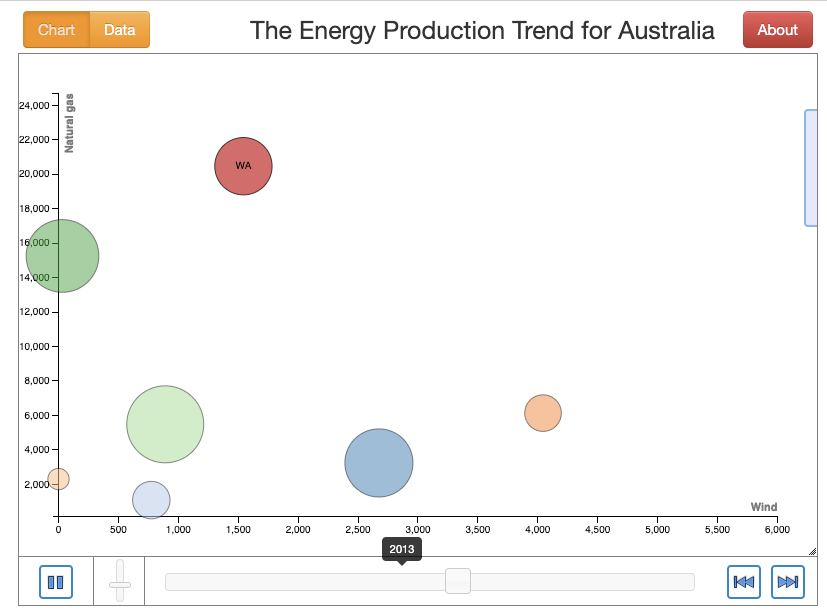

#### Comment:
Western Australia (WA) relied most on Natural gas for energy production in 2013. 

### A3.2.c.
Queensland (QLD) states reliance trend on Natural gas between 2009 to 2018 is observed. 

#### Comment:
As to Queensland (QLD), the reliance on Natural gas was steadily increasing from 2009 to 2012. However, there was a significant drop in the reliance on Natural gas starting from 2016 to 2018. The possible reason would be bans imposed by the Queensland government on underground coal gastification in 2016. This ban was made as the government believed the environmental risks were of greater importance than economic benefits.

Source: https://www.theguardian.com/australia-news/2016/apr/18/queensland-bans-underground-coal-gasification-over-environmental-risk


# B: Exploratory Analysis of the Twitter Dataset

## B1. Investigating the Data

In [20]:
#Read the data for twitter
twitter = pd.read_csv('twitter_data.csv')
twitter.head()

,text_score,text_score_expansion,hashtag,hasURL,isReply,length,tweet_topic_time_diff,semantic_overlap,#entityTypes,#entities,...,places_entities,nFollowers,nFriends,nFavorties,nListed,isVerified,isGeoEnabled,twitterAge,#tweetsPosted,relevanceJudge
0,-9.06819,-7.60786,0,1,0,116,1,0,1,3,...,1,7212,240,4,248,0,0,2.999663,13491,0
1,-9.20394,-7.70955,0,1,1,100,3,0,2,4,...,0,358,343,4,1,0,0,2.078992,2385,0
2,-9.19799,-7.70508,1,1,0,49,0,0,0,1,...,0,482,19,1,33,0,0,1.400101,172608,0
3,-16.00000,-16.00000,0,1,0,71,16,0,0,3,...,0,17,20,0,0,0,0,2.512816,3101,0
4,-16.00000,-16.00000,0,1,0,14,15,0,0,0,...,0,376,618,102,5,0,0,2.601267,1192,0


### B1.1. 
The number of tweets in the data file is identified. Among these, the number of tweets from a verified account is identified.

In [21]:
#Find the number of tweets
numberOfTweets = len(twitter.index)
print("Number of Tweets :",numberOfTweets)

#Count how many were from a verified account
verifiedTweets = twitter.loc[twitter['isVerified']==1]
numberOfVerified = len(verifiedTweets.index)
print("From a Verified Account :",numberOfVerified)

Number of Tweets : 39955
From a Verified Account : 218


#### Comment:
There are 39955 tweets in the data file. 
218 of these tweets were posted from a verified account. 


### B1.2. 
A histogram showing the distribution of #entities extracted from the tweets is drawn. An appropriate bin size was set to present this information.

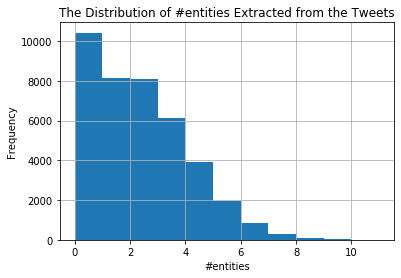

In [22]:
#Draw a histogram
#print(twitter.loc[twitter['#entities'].idxmin()]) lowest value 0
#print(twitter.loc[twitter['#entities'].idxmax()]) highest value 11
#Reference 9
twitter_hist = twitter['#entities'].hist(bins=11)
twitter_hist.set_title('The Distribution of #entities Extracted from the Tweets')
twitter_hist.set_xlabel('#entities')
twitter_hist.set_ylabel('Frequency')
plt.show()

### B1.3. 
The descriptive statistics (mean, std, quartile1, median, quartile3 and max ) of #entities of relevant (ie. relevanceJudge = 1) and non-relevant (ie. with relevanceJudge = 0) tweets in the dataset are computed. Some interesting findings are observed.

In [23]:
#Subset according to relevanceJudge
relevantTweets = twitter.loc[twitter['relevanceJudge']==1]
nonrelevantTweets= twitter.loc[twitter['relevanceJudge']==0]

print(relevantTweets['#entities'].describe())
#print(relevantTweets.describe())
print(nonrelevantTweets['#entities'].describe())

count    2817.000000
mean        2.367057
std         1.606369
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: #entities, dtype: float64
count    37138.000000
mean         1.882304
std          1.706187
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: #entities, dtype: float64


#### Comment:
It is interesting to see that most (around 93%) of the tweets are non-relevant but the mean value or the average value is higher in relevant tweets. That means on average relevant tweets include more named entities compared to non-relevant tweets. Given the mean value and the standard deviation for both types, it is inferred that the numbers are spread out over a range. Both types of tweets are having 2 and 3 for the 50th and the 75th percentile respectively. However, the 25th percentile was 1 for relevant tweets, while the 25th percentile for non-relevant tweets was 0. It is also interesting to see these values seem to be aligned well with the histogram above. 

### B1.4. 
The average length of the tweets (in characters) that are judged as relevant is calculated. The average length of a non-relevant tweet is also calculated.

In [24]:
#Find stats using describe() function
print(relevantTweets['length'].describe())
print(nonrelevantTweets['length'].describe())

count    2817.000000
mean       90.281505
std        30.817391
min         0.000000
25%        62.000000
50%        99.000000
75%       116.000000
max       141.000000
Name: length, dtype: float64
count    37138.000000
mean        87.819188
std         35.512467
min          0.000000
25%         58.000000
50%         96.000000
75%        116.000000
max        255.000000
Name: length, dtype: float64


#### Comment:
The average length of relevant tweets is approximately 90.
The average length of a non-relevant tweets is approximately 88.

### B1.5. 
To gain further insights into the twitter age of the users, the twitterAge in categorical bins is grouped. A new column twitter age group in the dataframe is created based on twitterAge by converting it into the following groupings or categories [‘0-1’,’1-2’,’2-3’,’3-4’, ‘4-5’, ‘5+’].

In [25]:
#print(twitter.loc[twitter['twitterAge'].idxmax()])#highest value 5.623593
#Reference 10
twitter['twitterAgeGroup'] = pd.cut(x=twitter['twitterAge'] , 
                                    bins=[0,1,2,3,4,5,6], labels=['0-1', '1-2','2-3','3-4','4-5','5+'], right=False)
twitter.head()

,text_score,text_score_expansion,hashtag,hasURL,isReply,length,tweet_topic_time_diff,semantic_overlap,#entityTypes,#entities,...,nFollowers,nFriends,nFavorties,nListed,isVerified,isGeoEnabled,twitterAge,#tweetsPosted,relevanceJudge,twitterAgeGroup
0,-9.06819,-7.60786,0,1,0,116,1,0,1,3,...,7212,240,4,248,0,0,2.999663,13491,0,2-3
1,-9.20394,-7.70955,0,1,1,100,3,0,2,4,...,358,343,4,1,0,0,2.078992,2385,0,2-3
2,-9.19799,-7.70508,1,1,0,49,0,0,0,1,...,482,19,1,33,0,0,1.400101,172608,0,1-2
3,-16.00000,-16.00000,0,1,0,71,16,0,0,3,...,17,20,0,0,0,0,2.512816,3101,0,2-3
4,-16.00000,-16.00000,0,1,0,14,15,0,0,0,...,376,618,102,5,0,0,2.601267,1192,0,2-3


### B1.5.a.
Boxplots summarising the distribution of each twitter age group against their tweet length are generated. 

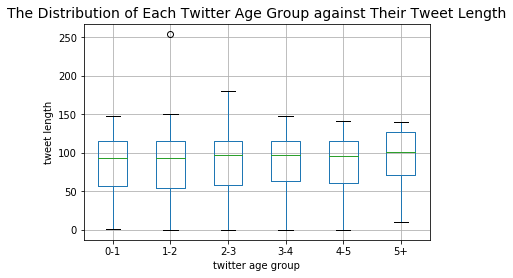

In [26]:
#Draw a boxplot
twitter.boxplot(column='length',by='twitterAgeGroup')
plt.xlabel('twitter age group')
plt.ylabel('tweet length')
plt.title('The Distribution of Each Twitter Age Group against Their Tweet Length', fontsize=14)
#Reference 11
plt.suptitle('')
plt.show()

#### Comment:
Across the age groups, there is a slight variation given the box plot above, though there is an outlier detected for the twitter age group "1-2".  The range as well as the interquartile range (IQR) does not vary much among twitter age groups. As to the maximum length, "2-3" group has more tweet length compared to other groups. However, as to the minimum length, "5+" group has more tweet length compared to other groups. It is also interesting to note that by looking at the interquartile range of "5+" group, 50% of this group had more tweet length on average when compared to other groups. Regarding the median, it is noted that the median of the group "0-2" and the group "1-2" is lower than any other group. This means that the authors who had been using Twitter less than 2 years had less tweet length, on average, compared to the authors using Twitter more than 2 years. As to the median of the group "5+", this group's median is higher than any other group, which also means that the authors using Twitter more than 5 years had more tweet length on average. 


### B1.5.b.
The age group with the lowest median tweet length and the age group with the highest are identified.

In [27]:
#Subset groupby twitterAgeGroup with median length
twitter_agegroup = twitter.groupby('twitterAgeGroup').agg(median=('length', 'median'))
twitter_agegroup

,median
twitterAgeGroup,
0-1,94.0
1-2,94.0
2-3,97.0
3-4,98.0
4-5,95.5
5+,101.0


#### Comment:
"0-1" and "1-2" age group has the lowest median tweet length which is 94.
"5+" group has the highest median tweet length which is 101.

### B1.5.c.
According to the current bushfire tweet dataset, the more active age group on twitter is identified.

In [28]:
#Subset groupby twitterAgeGroup with the number of tweets
twitter_agegroup_active = twitter.groupby('twitterAgeGroup').agg(numberOfTweets=('length','count'))
twitter_agegroup_active

,numberOfTweets
twitterAgeGroup,
0-1,1355
1-2,15423
2-3,17140
3-4,5014
4-5,932
5+,91


#### Comment:
"2-3" group is more active on twitter as this group has the highest number of tweets which is 17140. 

### B1.5.d.
A plot showing the total number of tweets posted by each age group (from Part [c] above) is drawn.

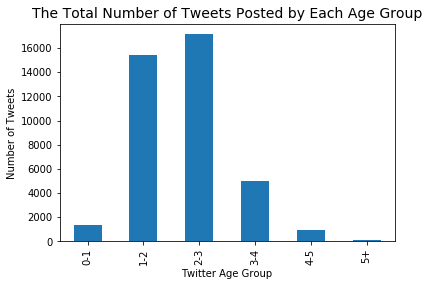

In [29]:
#Draw a plot
twitter_agegroup_active.plot(kind = 'bar',legend = False)
#Add title, label, etc.
plt.title("The Total Number of Tweets Posted by Each Age Group", fontsize=14)
plt.xlabel('Twitter Age Group')
plt.ylabel('Number of Tweets')
plt.show()

### B1.5.e.
The age group on average with the highest number of followers on twitter is identified.

In [52]:
#Subset groupby twitterAgeGroup with mean of nFollowers
twitter_agegroup_followers = twitter.groupby('twitterAgeGroup').agg(numberOfFollowers=('nFollowers','mean'))
twitter_agegroup_followers

,numberOfFollowers
twitterAgeGroup,
0-1,0.000000
1-2,1450.501394
2-3,3465.474971
3-4,10420.434583
4-5,37231.429185
5+,45927.219780


#### Comment:
"5+" group on average has the highest number of followers which is approximately 45927.

## B2. Exploring correlation in the Data
The twitter dataset is explored and any interesting relationship/correlations discovered amongst the tweet variables are described. 

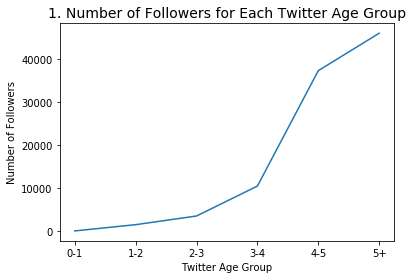

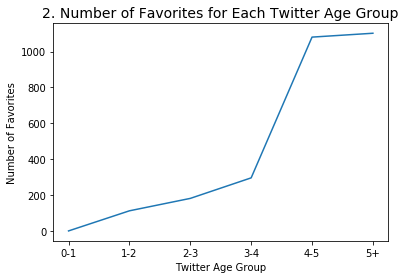

In [58]:
#twitter_agegroup_active.plot()
#twitter_agegroup_friends.plot()
#Plot x axis Twitter Age Group and y axis Number of Followers
twitter_agegroup_favorites = twitter.groupby('twitterAgeGroup').agg(numberOfFollowers=('nFavorties','mean'))
twitter_agegroup_followers.plot(legend=False)
b2_positions = (0,1,2,3,4,5) 
b2_labels = ('0-1', '1-2','2-3','3-4','4-5','5+')
plt.xticks(b2_positions, b2_labels)
plt.title("1. Number of Followers for Each Twitter Age Group",fontsize=14)
plt.xlabel('Twitter Age Group')
plt.ylabel('Number of Followers')
plt.show()
#Plot x axis Twitter Age Group and y axis Number of Favorites
twitter_agegroup_favorites.plot(legend=False)
b2_positions = (0,1,2,3,4,5) 
b2_labels = ('0-1', '1-2','2-3','3-4','4-5','5+')
plt.xticks(b2_positions, b2_labels)
plt.title("2. Number of Favorites for Each Twitter Age Group",fontsize=14)
plt.xlabel('Twitter Age Group')
plt.ylabel('Number of Favorites')
plt.show()

#While exploring the twitter dataset, 
#an interesting relationship between the number of followers and 
#the number of favorites was found
twitter_agegroup_favorites = twitter.groupby('twitterAgeGroup').agg(numberOfFavorites=('nFavorties','mean'))

#Two datasets, average number of followers per age group and
#average number of favorites per age group are merged into one dataset named "taf"
#Reference 5
taf= twitter_agegroup_followers.join(twitter_agegroup_favorites)

#Extract twitter age groups to be used as a separate column
group_type = list(twitter['twitterAgeGroup'].unique())
group_type.sort()
taf.insert(loc=0,column='twitterAgeGroup',value=group_type)
#Reference 7
taf.reset_index(inplace = True, drop = True)

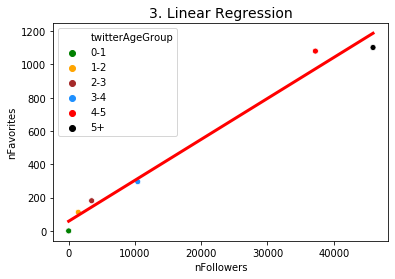

Predicted nFavorites when nFollowers is 50000: 1287 (mean value)
Predicted nFavorites when nFollowers is 50000: 1533 (mean value)

Actual nFavorites when nFollowers is 50000: 904 (mean value)
Actual nFavorites when nFollowers is 60000: 946 (mean value)


In [59]:
#Sort the data by twitter age group and save it to a new variable
#Reference 6, Reference 14
twitter_sorted = twitter.sort_values(by=['twitterAgeGroup'])
#Draw a scatter plot using Seaborn, assigning color to each group/point
#Reference 12
sns.scatterplot( x="numberOfFollowers", y="numberOfFavorites", 
data=taf, hue="twitterAgeGroup",palette=['green','orange','brown','dodgerblue','red','black'], legend='full')

#Linear regression model
slope, intercept, r_value, p_value, std_err = linregress(taf['numberOfFollowers'],taf['numberOfFavorites'])
#Use "for" syntax to compute the line
line = [slope*xi + intercept for xi in taf['numberOfFollowers']]
#Plot the "line"
plt.plot(taf['numberOfFollowers'],line,'r-', linewidth=3)
#Add title, label, legend, etc.
plt.title("3. Linear Regression",fontsize=14)
plt.xlabel('nFollowers')
plt.ylabel('nFavorites')
plt.show()

#Compute the line for prediction
n50000 = slope*(50000) + intercept
n60000 = slope*(60000) + intercept
print("Predicted nFavorites when nFollowers is 50000:", int(n50000),"(mean value)")
print("Predicted nFavorites when nFollowers is 50000:", int(n60000),"(mean value)")
print()
nFavorites_50000= twitter_sorted.loc[(twitter_sorted['nFollowers'] > 40000) & (twitter_sorted['nFollowers'] < 60000)]
print("Actual nFavorites when nFollowers is 50000:",round(nFavorites_50000['nFavorties'].mean(),),"(mean value)")
nFavorites_60000= twitter_sorted.loc[(twitter_sorted['nFollowers'] > 50000) & (twitter_sorted['nFollowers'] < 70000)]
print("Actual nFavorites when nFollowers is 60000:",round(nFavorites_60000['nFavorties'].mean(),),"(mean value)")

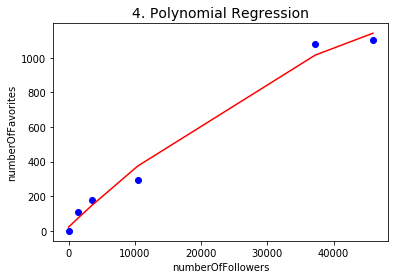

Predicted nFavorites when the number of followers is 50000:  1186 (mean value)
Predicted nFavorites when the number of followers is 60000:  1260 (mean value)

Actual nFavorites when nFollowers is 50000: 904 (mean value)
Actual nFavorites when nFollowers is 60000: 946 (mean value)


In [60]:
#Use polynomialfeatures and LinearRegression 
#Reference 13

#Set x and y value to build model
x = taf.iloc[:,1:2].values
y = taf.iloc[:,2].values

#Fit polynomial regression model
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 

poly.fit(x_poly, y)   
lrmodel = LinearRegression() 
lrmodel.fit(x_poly, y) 

#Visualising the Polynomial Regression results 
#Reference 12
plt.scatter(x,y,color = 'blue') 
plt.plot(x, lrmodel.predict(poly.fit_transform(x)), color = 'red') 
plt.title('4. Polynomial Regression', fontsize=14) 
plt.xlabel('numberOfFollowers') 
plt.ylabel('numberOfFavorites') 
plt.show() 

poly50000 = lrmodel.predict(poly.fit_transform([[50000]]))
poly60000 = lrmodel.predict(poly.fit_transform([[60000]]))

print("Predicted nFavorites when the number of followers is 50000: ", int(poly50000),"(mean value)")
print("Predicted nFavorites when the number of followers is 60000: ", int(poly60000),"(mean value)")
print()
print("Actual nFavorites when nFollowers is 50000:",round(nFavorites_50000['nFavorties'].mean(),),"(mean value)")
print("Actual nFavorites when nFollowers is 60000:",round(nFavorites_60000['nFavorties'].mean(),),"(mean value)")

#Reference 4
#plt.rcParams['figure.figsize'] = (12,10)

#### Comment:
While exploring the Twitter dataset, as seen from the first graph (1. Number of Followers for Each Twitter Age Group), it was noticeable that the longer the authors had been on Twitter, the more their followers were on average. Likewise, it was noted that the longer the authors had been on Twitter, the more their tweets were marked as favorite by others, on average, as seen from the second graph (2. Number of Favorites for Each Twitter Age Group). Further to such observation, it was interesting to find out that the number of followers and the number of tweets marked as favorite seemed to have a positive correlation (based on the mean value of twitter age group). That is, when the number of favorites increases as the number of followers increases. In order to predict the mean value of the number of favorites (nFavorites) when the number of followers (nFollowers) is 50000 and 60000, both linear regression and polynomial regression were used and compared (3. Linear Regression, 4. Polynomial Regression). As shown in the graphs above, polynomial regression seems to work better for this dataset as the range of nFavorites is closer to the actual range compared to linear regression prediction. For instance, when predicting nFavorites when nFollower is 50000, the polynomial regression shows the mean value of 1186 when the linear regression shows the mean value of 1287, while the actual mean value was 904. 

### Reference

1. Princeton Consultants. (n.d.). _Data Wrangling with pandas Cheat Sheet_. Retrieved from https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
2. Applied Data Science. (14 Dec 2019). _using pandas melt to create tidy data in Jupyter with Python_. Retrieved from https://www.youtube.com/watch?v=49PKysycCGc
3. Ben Alex Keen. (6 May 2017). _Bar Charts in Matplotlib_. Retrieved from https://benalexkeen.com/bar-charts-in-matplotlib/ 
4. Stack overflow. (24 Sep 2019). _USING plt.rcParams_. Retrieved from https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
5. pandas. (n.d.). _Merge, join, and concatenate_. Retrieved from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
6. Stack overflow. (1 Dec 2016). _Pandas DataFrame bar plot with sort_values by other column_. Retrieved from https://stackoverflow.com/questions/40902958/pandas-dataframe-bar-plot-with-sort-values-by-other-column
7. GeeksforGeeks. (n.d.). _Reset Index in Pandas Dataframe_. Retrieved from https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/
8. Stack overflow. (5 Feb 2015). _How to pivot a dataframe in Pandas? [duplicate]_. Retrieved from https://stackoverflow.com/questions/28337117/how-to-pivot-a-dataframe-in-pandas
9. 
Noureddin Sadawi. (28 Dec 2016). _48- Pandas DataFrames: Generating Histogram Plots_. Retrieved from https://www.youtube.com/watch?v=zQy0lEfXsVI
10. JournalDev. (n.d.). _Pandas cut() Function Examples_. Retrieved from https://www.journaldev.com/33394/pandas-cut-function-examples
11. Stack overflow. (7 May 2014). _Set no title for pandas boxplot (groupby)_. Retrieved from https://stackoverflow.com/questions/23507229/set-no-title-for-pandas-boxplot-groupby
12. cmdline. (20 April 2019). _How To Specify Colors to Scatter Plots in Python?_. Retrieved from https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/
13. GeeksforGeeks. (n.d.). _Python | Implementation of Polynomial Regression_. Retrieved from https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
14. pandas. (n.d.). _pandas.DataFrame.sort_values_. Retrieved from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html